In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from glob import glob
import datetime

## Contextualizing the problem

Normal operating condition

In [2]:
data = np.genfromtxt('d00_te.dat')
data.shape

(960, 52)

Fault #1

In [3]:
fault_1 = np.genfromtxt('d01_te.dat')
data.shape

(960, 52)

### Dataset for each fault

Plot of variable 1

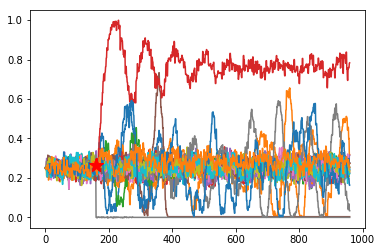

In [4]:
paths = glob('d*_te.dat')
dfs = {}
columns_name = range(1,53)
for mov in range(0,len(paths)):
    data = np.genfromtxt(paths[mov])
    dfs[mov] = pd.DataFrame(data=data,columns=columns_name)    
    plt.plot(dfs[mov].iloc[:,0])
    plt.plot(160,dfs[0].iloc[160,0], 'r*',markersize=14)
plt.show()

In [5]:
max_v1 = dfs[0].iloc[:,0].max()
mean_v1 = dfs[0].iloc[:,0].mean()
min_v1 = dfs[0].iloc[:,0].min()
plot_x = range(0,len(dfs[1].iloc[:,0]))

# 90% UP AND DOWN THE MEAN

mean_up = mean_v1+(0.9*abs(max_v1-mean_v1))
mean_down = mean_v1-(0.9*abs(min_v1-mean_v1))

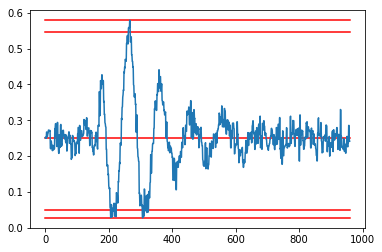

In [6]:
plt.plot(plot_x,[max_v1]*len(dfs[1].iloc[:,0]),'r')
plt.plot(plot_x,[mean_up]*len(dfs[1].iloc[:,0]),'r')
plt.plot(plot_x,[mean_v1]*len(dfs[1].iloc[:,0]),'r')
plt.plot(plot_x,[mean_down]*len(dfs[1].iloc[:,0]),'r')
plt.plot(plot_x,[min_v1]*len(dfs[1].iloc[:,0]),'r')
#plt.plot(dfs[1].iloc[:,0])
plt.plot(dfs[0].iloc[:,0])
plt.show()

### New signal

In [7]:
dfs1 = dfs[1]
dfs1.head()

,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
0,0.24975,3643.7,4515.6,9.3650,26.918,42.056,2703.7,75.977,120.40,0.33576,...,53.904,24.720,62.749,22.190,40.230,40.289,45.095,47.298,41.250,18.073
1,0.25070,3675.9,4508.2,9.3657,26.505,42.221,2705.4,74.833,120.39,0.33750,...,53.993,24.626,62.241,22.007,40.018,38.353,44.789,47.440,41.108,17.501
2,0.24939,3648.0,4539.0,9.2663,27.008,42.607,2706.8,75.550,120.42,0.33778,...,53.624,24.763,61.248,22.228,39.982,38.718,47.165,47.459,41.555,18.627
3,0.25143,3668.3,4481.5,9.2949,26.714,42.302,2705.5,75.441,120.41,0.33601,...,54.313,24.562,61.412,22.103,40.198,36.441,47.802,47.504,41.310,20.383
4,0.25546,3624.7,4457.6,9.3807,26.906,42.227,2706.9,76.041,120.37,0.34574,...,54.621,25.354,60.937,22.305,40.550,40.812,47.486,47.509,41.037,18.659


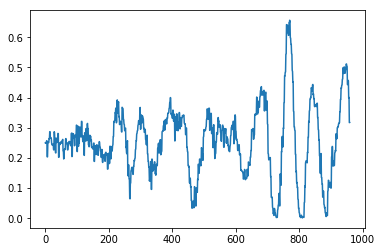

In [8]:
plt.plot(dfs1[1])

### Short code: Generic for all variables, picking one by one individually 

In [9]:
def tennessee_resampling(data,v,f,p):

    v = int(v)
    f = int(f)
    paths = glob(data)
    dfs = {}
    columns_name = range(1,53)    
    for mov in range(0,len(paths)):
        data = np.genfromtxt(paths[mov])
        dfs[mov] = pd.DataFrame(data=data,columns=columns_name)    


    max_v1 = dfs[0].iloc[:,v-1].max()
    mean_v1 = dfs[0].iloc[:,v-1].mean()
    min_v1 = dfs[0].iloc[:,v-1].min()
    #plot_x = range(0,len(dfs[1].iloc[:,0]))

    # UP AND DOWN THE MEAN
    
    mean_up = mean_v1+((p/100)*abs(max_v1-mean_v1))
    mean_down = mean_v1-((p/100)*abs(min_v1-mean_v1))
    
    if p==0:
        margin_up = mean_v1+((90/100)*abs(max_v1-mean_v1))
        margin_down = mean_v1-((90/100)*abs(min_v1-mean_v1))
    else:
        margin_up = mean_up
        margin_down = mean_down

    dfs1 = dfs[f]
    index1 = dfs1[dfs1[v].between(mean_down,mean_up)].index
    dfs1.loc[index1,v] = mean_v1
    index2 = dfs1.index.drop(index1)
    
    
    index = len(index1)/len(dfs1)

    plot_x = range(0,len(dfs[0].iloc[:,0]))
    
    plot_yu = [margin_up]*len(plot_x)
    plot_yd = [margin_down]*len(plot_x)
    
    return dfs1,index,plot_x,plot_yu,plot_yd

### Picking up a variable 0 < v < 53 and a fault 1 < fault < 22

In [10]:
from matplotlib import style
style.use('seaborn-paper')

In [11]:
import matplotlib 
matplotlib.rcParams.update({'font.size': 16})

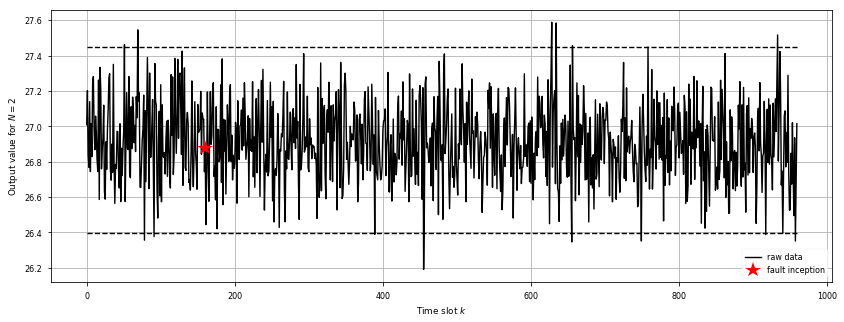

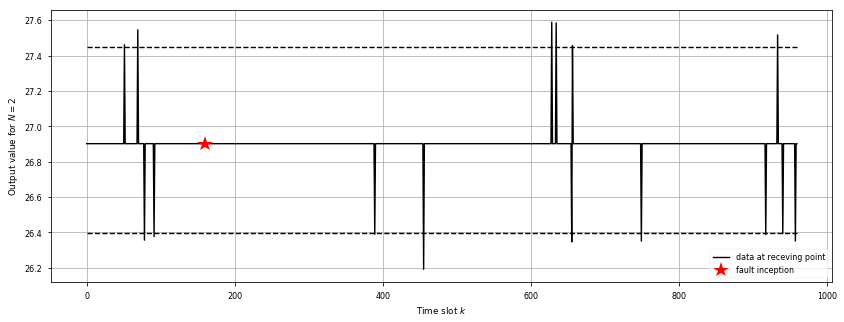

In [12]:
# Picking up a variable from 0 < v < 53
variable = 5
# Picking up a fault from 1 < fault < 22
fault = 10

# Defining compression rate of the data
percentage = 0

plt.figure(figsize=(14,5))
graph,index_0,plot_x0,plot_yu0,plot_yd0 = tennessee_resampling('d*_te.dat',variable,fault,percentage)
plt.plot(graph[variable],'k',label='raw data')
plt.plot(plot_x0,plot_yu0,'k--')
plt.plot(plot_x0,plot_yd0,'k--')
plt.plot(160,graph.iloc[160,variable-1], 'k*',markersize=16,label='fault inception', color='r')
plt.legend(loc='lower right')
#plt.axis([0, 960,0.1, 0.4])
plt.xlabel('Time slot $k$')
plt.ylabel('Output value for $N = 2$')
plt.grid()
plt.savefig('original.pdf', bbox_inches='tight', pad_inches=0.1, dpi=600)
plt.show()

# Defining compression rate of the data
percentage = 90

plt.figure(figsize=(14,5))
graph,index,plot_x,plot_yu,plot_yd = tennessee_resampling('d*_te.dat',variable,fault,percentage)
plt.plot(graph[variable],'k',label='data at receving point')
plt.plot(plot_x,plot_yu,'k--')
plt.plot(plot_x,plot_yd,'k--')
plt.plot(160,graph.iloc[160,variable-1], 'k*',markersize=16,label='fault inception', color='r')
#plt.axis([0, 960,0.1, 0.4])
plt.legend(loc='lower right')
plt.xlabel('Time slot $k$')
plt.ylabel('Output value for $N = 2$')
plt.grid()
plt.savefig('event-driven.pdf', bbox_inches='tight', pad_inches=0.1, dpi=600)
plt.show()

## For each variable Compression index: 
### Number of samples transmited / Total signal samples

In [13]:
index

0.984375

## Cycling through of all 52 variables 

In [14]:
paths = glob('d*_te.dat')
dfs = {}
columns_name = range(1,53)    
for mov in range(0,len(paths)):
    data = np.genfromtxt(paths[mov])
    dfs[mov] = pd.DataFrame(data=data,columns=columns_name)

In [15]:
#Cycling through faults, 1 < f < 22
f = 5

In [16]:
dfs1 = dfs[f]
dfs1.head()

,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
0,0.24899,3657.2,4545.0,9.4084,26.895,42.445,2705.0,74.635,120.40,0.33667,...,53.553,24.795,59.783,22.341,40.119,41.224,46.773,47.348,41.266,18.092
1,0.24934,3652.7,4500.7,9.3025,27.209,42.120,2706.0,74.960,120.40,0.33663,...,54.083,24.760,60.483,22.554,40.124,34.524,44.999,47.587,40.983,17.679
2,0.24856,3629.5,4477.3,9.3286,26.483,42.600,2704.6,75.036,120.41,0.33917,...,54.363,24.844,61.044,21.970,39.813,41.849,48.342,47.504,41.214,17.421
3,0.25219,3625.5,4566.2,9.4262,27.149,42.437,2703.5,75.675,120.38,0.33386,...,53.298,24.488,58.240,22.079,40.460,42.350,49.280,47.283,41.120,17.346
4,0.23994,3646.6,4487.9,9.4232,26.702,42.409,2705.2,74.241,120.41,0.32965,...,54.022,23.921,62.526,22.521,39.179,36.990,45.103,47.435,41.262,17.671


In [17]:
#Cycling through variables, 0 < v < 52
v = 1

# Percentage
percentage = [90,95]             
p = 90

paths = glob('d*_te.dat')
dfs = {}

columns_list = ['Index_' + str(x) for x in range(1,53)]
columns_name = ['Variable_' + str(x) for x in range(1,53)]   

index_z = np.zeros((21,52))
compression_df = pd.DataFrame(data=index_z,columns=columns_list) 
compression_df.index= ['Fault_' + str(x) for x in range(1,22)]  

for mov in range(0,len(paths)):
    data = np.genfromtxt(paths[mov])
    dfs[mov] = pd.DataFrame(data=data,columns=columns_name)    
    
Zeros = np.zeros((len(paths)-1,len(dfs[1])),dtype='int64')
hist_df = pd.DataFrame(data=Zeros,columns=range(1,len(dfs[1])+1)) 
hist_df.index= ['Fault_' + str(x) for x in range(1,22)] 

for f in range(1,22):    
    for v in range(1,53): 
        
        max_v1 = dfs[0].iloc[:,v-1].max()
        mean_v1 = dfs[0].iloc[:,v-1].mean()
        min_v1 = dfs[0].iloc[:,v-1].min()
            #plot_x = range(0,len(dfs[1].iloc[:,0]))

            # 90% UP AND DOWN THE MEAN

        mean_up = mean_v1+((p/100)*abs(max_v1-mean_v1))
        mean_down = mean_v1-((p/100)*abs(min_v1-mean_v1))

        dfs1 = dfs[f]
        index1 = dfs1[dfs1['Variable_' + str(v)].between(mean_down,mean_up)].index
        dfs1.loc[index1,v] = mean_v1
        
        index2 = dfs1.index.drop(index1)
        X = np.zeros(960,dtype='int64')
        X[index2] = 1
        
        hist_df.loc['Fault_' + str(f)] = hist_df.loc['Fault_' + str(f)] + X

        compression_df.loc['Fault_' + str(f),'Index_' + str(v)] = len(index1)/len(dfs1)

In [18]:
compression_df.head()

,Index_1,Index_2,Index_3,Index_4,Index_5,Index_6,Index_7,Index_8,Index_9,Index_10,...,Index_43,Index_44,Index_45,Index_46,Index_47,Index_48,Index_49,Index_50,Index_51,Index_52
Fault_1,0.920833,0.975000,0.932292,0.932292,0.989583,0.961458,0.944792,0.958333,0.840625,0.967708,...,0.947917,0.919792,0.718750,0.921875,0.950000,0.990625,0.988542,0.977083,0.910417,0.951042
Fault_2,1.000000,0.997917,1.000000,1.000000,0.991667,1.000000,1.000000,1.000000,0.996875,1.000000,...,1.000000,1.000000,0.904167,1.000000,1.000000,0.996875,0.996875,1.000000,1.000000,0.995833
Fault_3,1.000000,0.998958,1.000000,1.000000,0.984375,1.000000,1.000000,1.000000,0.992708,1.000000,...,1.000000,1.000000,0.873958,0.926042,1.000000,0.998958,0.992708,1.000000,1.000000,0.996875
Fault_4,1.000000,0.995833,1.000000,1.000000,0.988542,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.869792,1.000000,1.000000,0.995833,0.996875,1.000000,1.000000,0.995833
Fault_5,0.359375,0.380208,0.958333,0.345833,0.996875,0.357292,0.351042,0.952083,0.975000,0.987500,...,0.371875,0.367708,0.344792,0.367708,0.382292,0.995833,0.995833,0.409375,0.370833,0.370833


In [19]:
hist_df.head()

,1,2,3,4,5,6,7,8,9,10,...,951,952,953,954,955,956,957,958,959,960
Fault_1,0,0,0,0,0,1,0,0,0,0,...,2,1,4,4,4,3,4,2,3,2
Fault_2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Fault_3,0,0,0,0,0,1,2,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Fault_4,0,1,0,0,0,1,1,1,1,1,...,0,0,1,0,0,1,0,0,1,0
Fault_5,0,0,0,1,0,0,0,0,0,0,...,33,33,32,32,32,34,35,35,35,35


## Tennessee -resampled datasets for PCA -calculations